#### Context

Here is a dataset made of measures on penguins. Use clustering algorithms to try to categorize penguins into different species.

**Dataset**

- `culmen_length_mm`: culmen length (mm)
- `culmen_depth_mm`: culmen depth (mm)
- `flipper_length_mm`: flipper length (mm)
- `body_mass_g`: body mass (g)
- `sex`: penguin sex

source : [Kaggle](https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/data)

In [1]:
import pandas as pd
df=pd.read_csv("data.csv")
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE


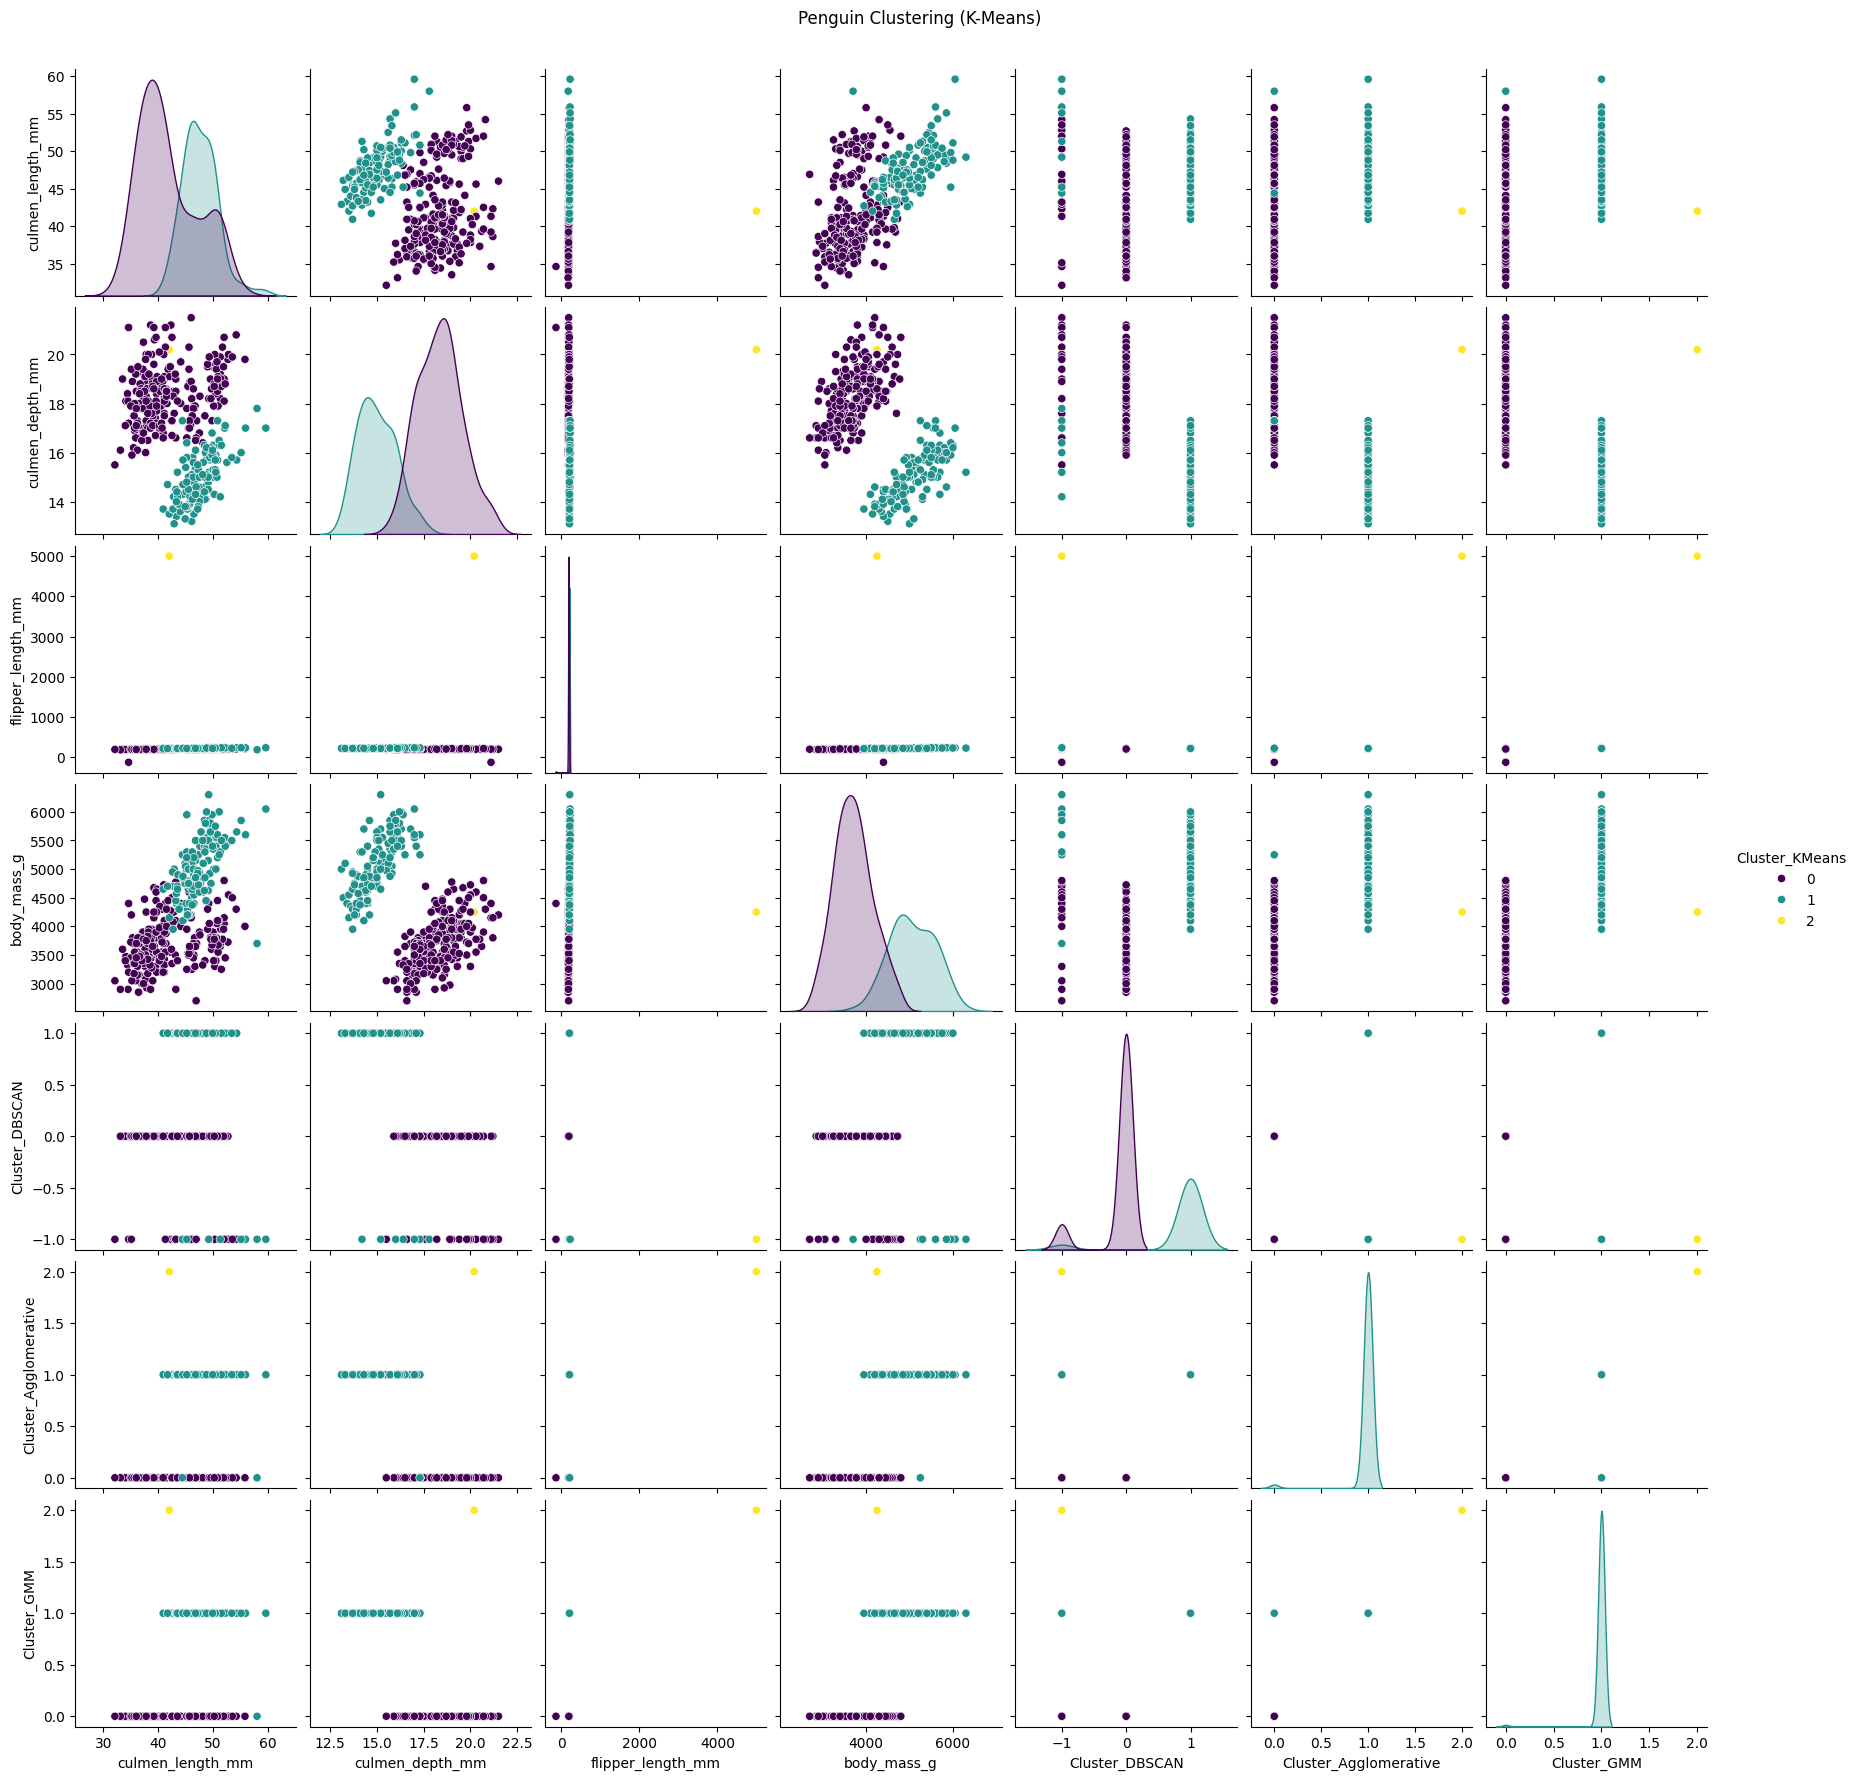

Silhouette Score (KMeans): 0.4954280396165052
Silhouette Score (DBSCAN): 0.43652331784047255
Silhouette Score (Agglomerative): 0.4940913477872768
Silhouette Score (GMM): 0.49589929520928333
  Cluster_KMeans culmen_length_mm           culmen_depth_mm            \
                             mean       std            mean       std   
0              0        41.835023  5.391821       18.363594  1.188257   
1              1        47.589516  3.210750       15.004839  1.009456   
2              2        42.000000       NaN       20.200000       NaN   

  flipper_length_mm             body_mass_g                  sex  \
               mean        std         mean         std <lambda>   
0        190.313364  23.138741  3708.294931  436.719246     MALE   
1        216.895161   7.230040  5064.919355  517.046012     MALE   
2       5000.000000        NaN  4250.000000         NaN     MALE   

  Cluster_KMeans  
           count  
0            219  
1            124  
2              1  


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the penguin dataset
# Replace 'path/to/your/penguin_dataset.csv' with the actual path to your dataset
data_path = 'data.csv'
penguins = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
print(penguins.head())

# Select relevant features for clustering
selected_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins[selected_features]

# Handle missing values if any
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Dictionary to store silhouette scores for each algorithm
silhouette_scores = {}

# K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
penguins['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)
silhouette_scores['KMeans'] = silhouette_score(X_scaled, penguins['Cluster_KMeans'])

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
penguins['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)
silhouette_scores['DBSCAN'] = silhouette_score(X_scaled, penguins['Cluster_DBSCAN'])

# Agglomerative Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
penguins['Cluster_Agglomerative'] = agg_cluster.fit_predict(X_scaled)
silhouette_scores['Agglomerative'] = silhouette_score(X_scaled, penguins['Cluster_Agglomerative'])

# Gaussian Mixture Models
gmm = GaussianMixture(n_components=3, random_state=42)
penguins['Cluster_GMM'] = gmm.fit_predict(X_scaled)
silhouette_scores['GMM'] = silhouette_score(X_scaled, penguins['Cluster_GMM'])

# Visualize the clusters for K-Means (you can do similar for other algorithms)
sns.pairplot(penguins, hue='Cluster_KMeans', palette='viridis')
plt.suptitle('Penguin Clustering (K-Means)', y=1.02)
plt.show()

# Print silhouette scores for each algorithm
for algorithm, score in silhouette_scores.items():
    print(f"Silhouette Score ({algorithm}): {score}")

# Analyze the characteristics of each cluster (you can do similar for other algorithms)
cluster_summary_kmeans = penguins.groupby('Cluster_KMeans').agg({
    'culmen_length_mm': ['mean', 'std'],
    'culmen_depth_mm': ['mean', 'std'],
    'flipper_length_mm': ['mean', 'std'],
    'body_mass_g': ['mean', 'std'],
    'sex': lambda x: x.value_counts().index[0],
    'Cluster_KMeans': 'count'  # Count of samples in each cluster
}).reset_index()

print(cluster_summary_kmeans)


### Process data beforec lustering

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE


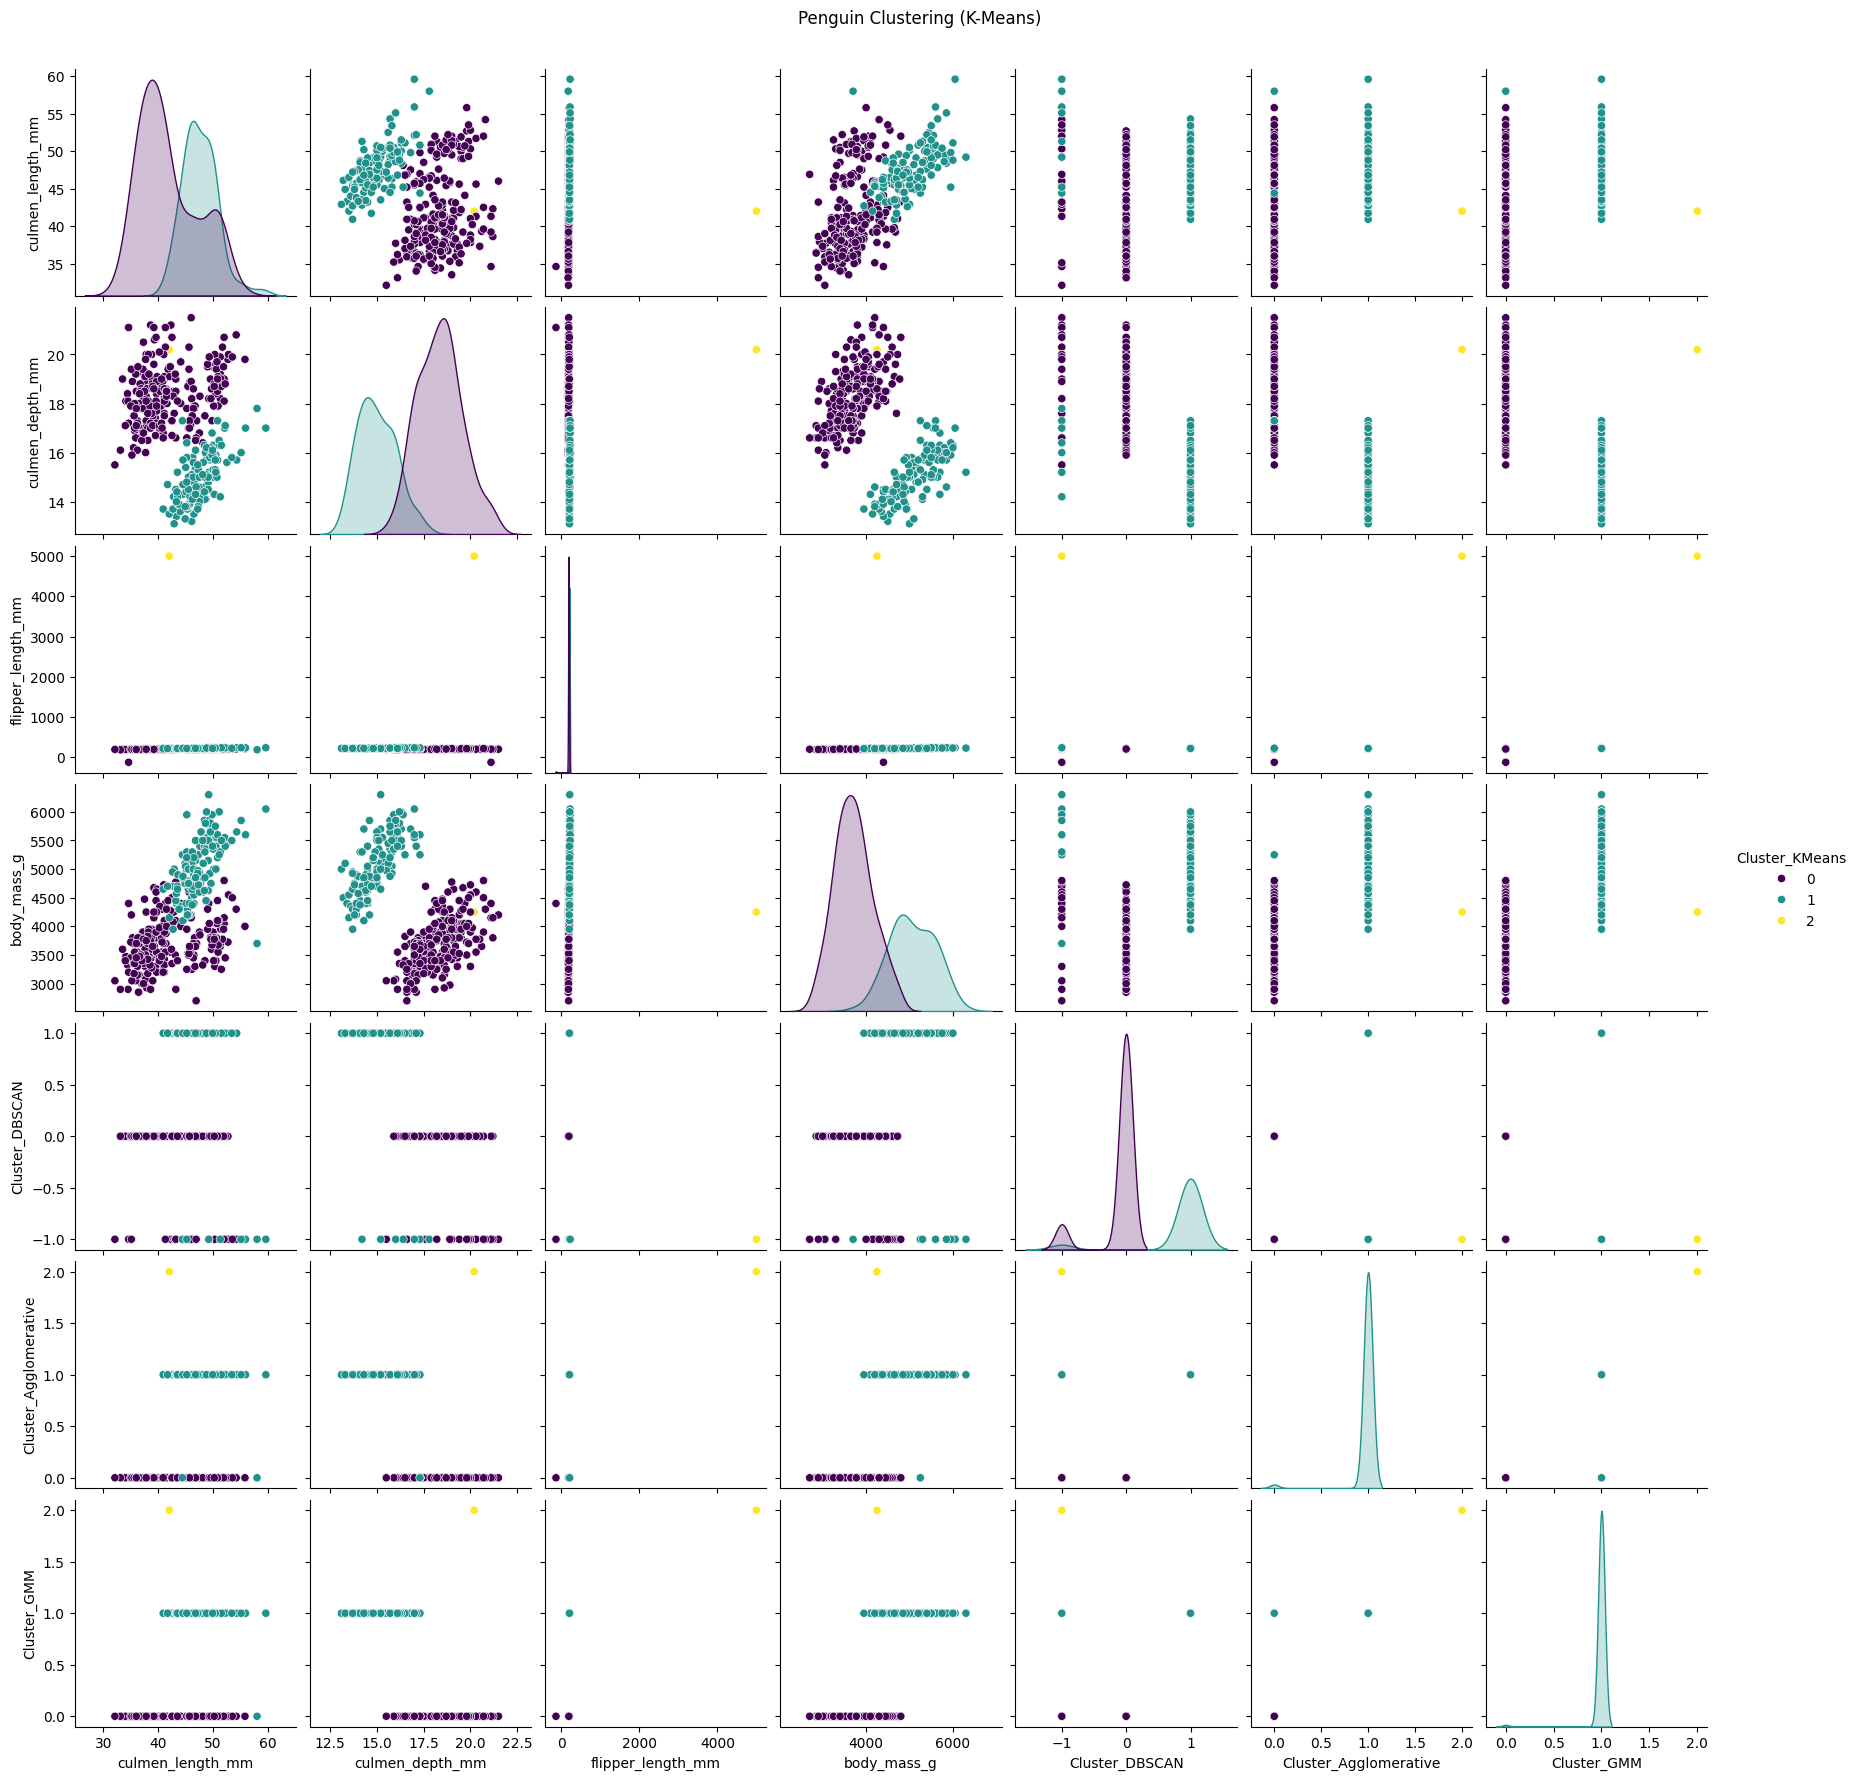

Silhouette Score (KMeans): 0.4954280396165052
Silhouette Score (DBSCAN): 0.43652331784047255
Silhouette Score (Agglomerative): 0.4940913477872768
Silhouette Score (GMM): 0.49589929520928333
  Cluster_KMeans culmen_length_mm           culmen_depth_mm            \
                             mean       std            mean       std   
0              0        41.835023  5.391821       18.363594  1.188257   
1              1        47.589516  3.210750       15.004839  1.009456   
2              2        42.000000       NaN       20.200000       NaN   

  flipper_length_mm             body_mass_g             Cluster_KMeans  
               mean        std         mean         std          count  
0        190.313364  23.138741  3708.294931  436.719246            219  
1        216.895161   7.230040  5064.919355  517.046012            124  
2       5000.000000        NaN  4250.000000         NaN              1  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the penguin dataset
# Replace 'path/to/your/penguin_dataset.csv' with the actual path to your dataset
data_path = 'data.csv'
penguins = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
print(penguins.head())

# Select relevant features for clustering
selected_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins[selected_features]

# Handle missing values if any
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Define categorical and numerical columns
categorical_columns = []  # Replace 'sex' with the actual categorical columns in your dataset
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Apply preprocessing to the selected features
X_transformed = preprocessor.fit_transform(X_imputed)

# Dictionary to store silhouette scores for each algorithm
silhouette_scores = {}

# K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
penguins['Cluster_KMeans'] = kmeans.fit_predict(X_transformed)
silhouette_scores['KMeans'] = silhouette_score(X_transformed, penguins['Cluster_KMeans'])

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
penguins['Cluster_DBSCAN'] = dbscan.fit_predict(X_transformed)
silhouette_scores['DBSCAN'] = silhouette_score(X_transformed, penguins['Cluster_DBSCAN'])

# Agglomerative Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
penguins['Cluster_Agglomerative'] = agg_cluster.fit_predict(X_transformed)
silhouette_scores['Agglomerative'] = silhouette_score(X_transformed, penguins['Cluster_Agglomerative'])

# Gaussian Mixture Models
gmm = GaussianMixture(n_components=3, random_state=42)
penguins['Cluster_GMM'] = gmm.fit_predict(X_transformed)
silhouette_scores['GMM'] = silhouette_score(X_transformed, penguins['Cluster_GMM'])

# Visualize the clusters for K-Means (you can do similar for other algorithms)
sns.pairplot(penguins, hue='Cluster_KMeans', palette='viridis')
plt.suptitle('Penguin Clustering (K-Means)', y=1.02)
plt.show()

# Print silhouette scores for each algorithm
for algorithm, score in silhouette_scores.items():
    print(f"Silhouette Score ({algorithm}): {score}")

# Analyze the characteristics of each cluster (you can do similar for other algorithms)
cluster_summary_kmeans = penguins.groupby('Cluster_KMeans').agg({
    'culmen_length_mm': ['mean', 'std'],
    'culmen_depth_mm': ['mean', 'std'],
    'flipper_length_mm': ['mean', 'std'],
    'body_mass_g': ['mean', 'std'],
    'Cluster_KMeans': 'count'  # Count of samples in each cluster
}).reset_index()

print(cluster_summary_kmeans)
